# Credit Card Fraud Detection 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression


In [2]:
df = pd.read_csv('dataset/creditcard.csv')
print(df.head())
print(df.info())
print(df['Class'].value_counts())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [3]:
# Separating features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [4]:
# Using SMOTE to oversample the minority class
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print(f"Original dataset shape: {y_train.shape}")
print(f"Resampled dataset shape: {y_train_res.shape}")


Original dataset shape: (227845,)
Resampled dataset shape: (454902,)


In [5]:
from sklearn.linear_model import LogisticRegression

# Define and train Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train_res, y_train_res)


LogisticRegression(random_state=42)

In [6]:
# Predicting on the test set
y_pred_lr = lr.predict(X_test)

In [7]:
# Evaluate Logistic Regression
print("Logistic Regression Performance:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Performance:
[[55399  1465]
 [    8    90]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



In [8]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train and evaluate the model with SMOTE
lr.fit(X_train_smote, y_train_smote)
y_pred_lr_smote = lr.predict(X_test)

print("Logistic Regression Performance after SMOTE:")
print(confusion_matrix(y_test, y_pred_lr_smote))
print(classification_report(y_test, y_pred_lr_smote))


Logistic Regression Performance after SMOTE:
[[55399  1465]
 [    8    90]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



In [9]:
from sklearn.neural_network import MLPClassifier

# Initialize MLPClassifier
mlp = MLPClassifier(random_state=42)

# Train the model
mlp.fit(X_train_smote, y_train_smote)

# Predict and evaluate
y_pred_mlp = mlp.predict(X_test)
print("MLP Performance:")
print(confusion_matrix(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))


MLP Performance:
[[56840    24]
 [   18    80]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.82      0.79        98

    accuracy                           1.00     56962
   macro avg       0.88      0.91      0.90     56962
weighted avg       1.00      1.00      1.00     56962



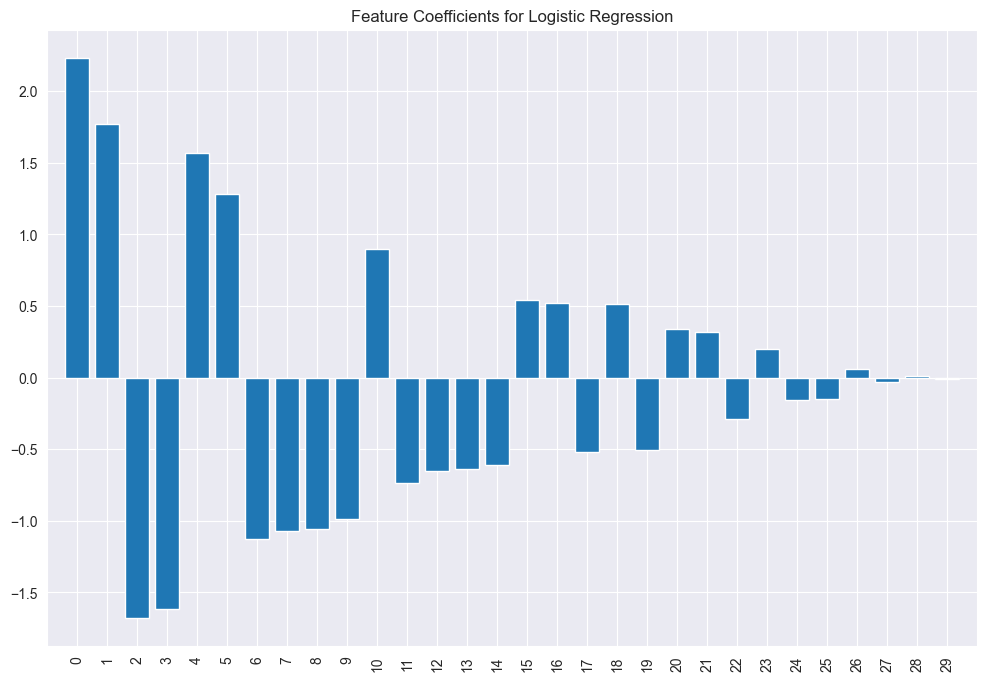

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# For Logistic Regression
coefficients = lr.coef_[0]
indices = np.argsort(np.abs(coefficients))[::-1]

# Plot feature coefficients
plt.figure(figsize=(12, 8))
plt.title('Feature Coefficients for Logistic Regression')
plt.bar(range(len(coefficients)), coefficients[indices], align='center')
plt.xticks(range(len(coefficients)), range(len(coefficients)), rotation=90)
plt.xlim([-1, len(coefficients)])
plt.show()


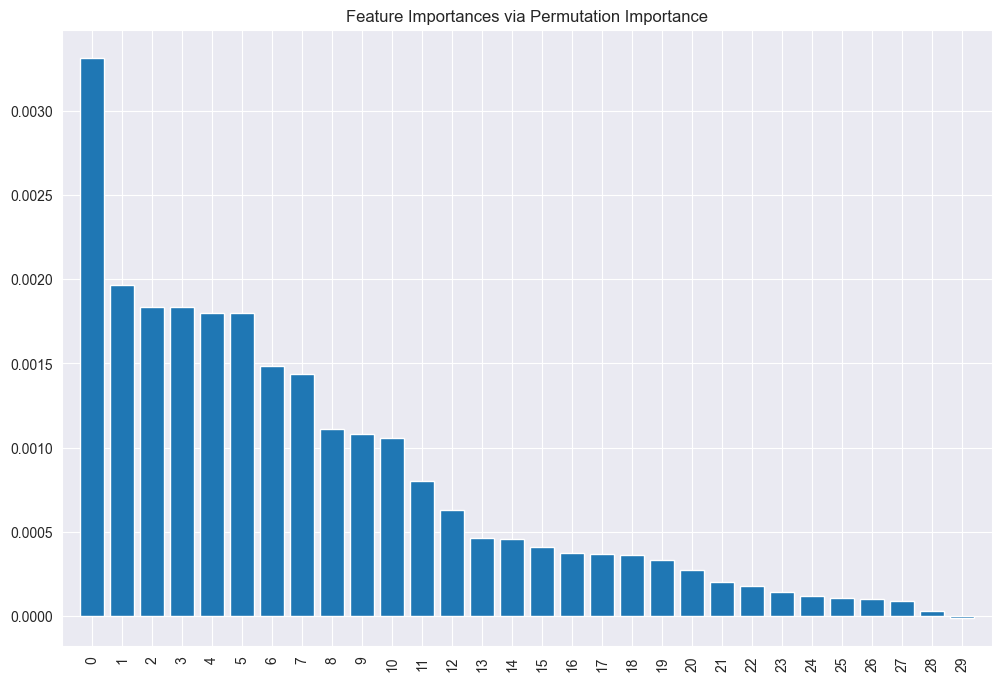

In [11]:
from sklearn.inspection import permutation_importance

# Compute permutation importance
results = permutation_importance(mlp, X_test, y_test, scoring='accuracy')

# Plot feature importances
importances = results.importances_mean
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title('Feature Importances via Permutation Importance')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), range(len(importances)), rotation=90)
plt.xlim([-1, len(importances)])
plt.show()


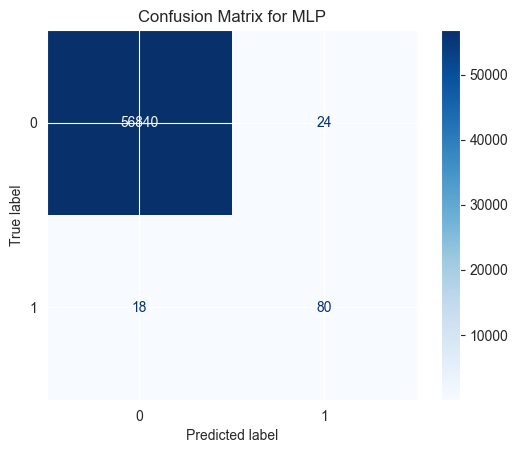

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay

# For MLP
y_pred_mlp = mlp.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_mlp)).plot(cmap='Blues')
plt.title('Confusion Matrix for MLP')
plt.show()
